<a href="https://colab.research.google.com/github/DataBytes-Organisation/Project-Echo/blob/EE%2Fpd%2Fonboarding/birds_classification_00_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

## Loading and Preprocessing Bird Images for Machine Learning

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np

def load_images_from_path(base_path, birds):
    images = []
    labels = []
    for bird in birds:
        bird_path = os.path.join(base_path, bird)
        print(f"Looking in directory: {bird_path}")  # Debug: show the bird directory being checked

        if not os.path.exists(bird_path):
            print(f"Bird directory not found: {bird_path}")
            continue

        for root, dirs, files in os.walk(bird_path):
            for file in files:
                if file.endswith(('jpg', 'jpeg', 'png')):
                    img_path = os.path.join(root, file)
                    print(f"Loading image: {img_path}")  # Debug: show each image being loaded
                    img_loaded = load_img(img_path, target_size=(224, 224, 3))
                    img_array = img_to_array(img_loaded)
                    images.append(img_array)
                    labels.append(bird)

    return np.array(images), np.array(labels)

# Define the path and list of bird subfolders
drive_folder_path = 'F:/Jacob/Project_Echo/Images/'
birds = os.listdir(drive_folder_path)

# Load images and labels
images, labels = load_images_from_path(drive_folder_path, birds)

Looking in directory: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_11.250-13.250.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_11.750-13.750.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_12.800-14.800.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_13.250-15.250.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_14.750-16.050.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_16.750-18.750.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_17.600-19.600.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_17.750-19.750.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_18.500-20.500.png
Loading image: F:/Jacob/Project_Echo/Images/Acanthiza chrysorrhoa\region_22.750-24.750.png
Loading image: F:

## Spliting for Train and Test

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")


Training set size: 4095, Test set size: 1024


## Normalizing Image Data

In [ ]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0


## Encoding and One-Hot Encoding of Image Labels for Neural Network Training

In [ ]:
# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)


##  Building a Convolutional Neural Network (CNN) for Bird Species Classification

In [ ]:
# Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(birds), activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [early_stopping, reduce_lr]

In [ ]:
# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot), callbacks=callbacks)



Epoch 1/10
128/128 [==============================] - 28s 101ms/step - loss: 3.6628 - accuracy: 0.2059 - val_loss: 2.8204 - val_accuracy: 0.3877
Epoch 2/10
128/128 [==============================] - 11s 90ms/step - loss: 2.5809 - accuracy: 0.3822 - val_loss: 2.1326 - val_accuracy: 0.5088
Epoch 3/10
128/128 [==============================] - 12s 94ms/step - loss: 1.9509 - accuracy: 0.5136 - val_loss: 1.7243 - val_accuracy: 0.6152
Epoch 4/10
128/128 [==============================] - 14s 111ms/step - loss: 1.4347 - accuracy: 0.6298 - val_loss: 1.4238 - val_accuracy: 0.6475
Epoch 5/10
128/128 [==============================] - 17s 134ms/step - loss: 1.0591 - accuracy: 0.6999 - val_loss: 1.2504 - val_accuracy: 0.7080
Epoch 6/10
128/128 [==============================] - 19s 145ms/step - loss: 0.7981 - accuracy: 0.7797 - val_loss: 1.2486 - val_accuracy: 0.7070
Epoch 7/10
128/128 [==============================] - 19s 152ms/step - loss: 0.5596 - accuracy: 0.8408 - val_loss: 1.2035 - val_accu

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


32/32 [==============================] - 1s 28ms/step - loss: 1.3101 - accuracy: 0.7393
Test accuracy: 73.93%


## Plotting

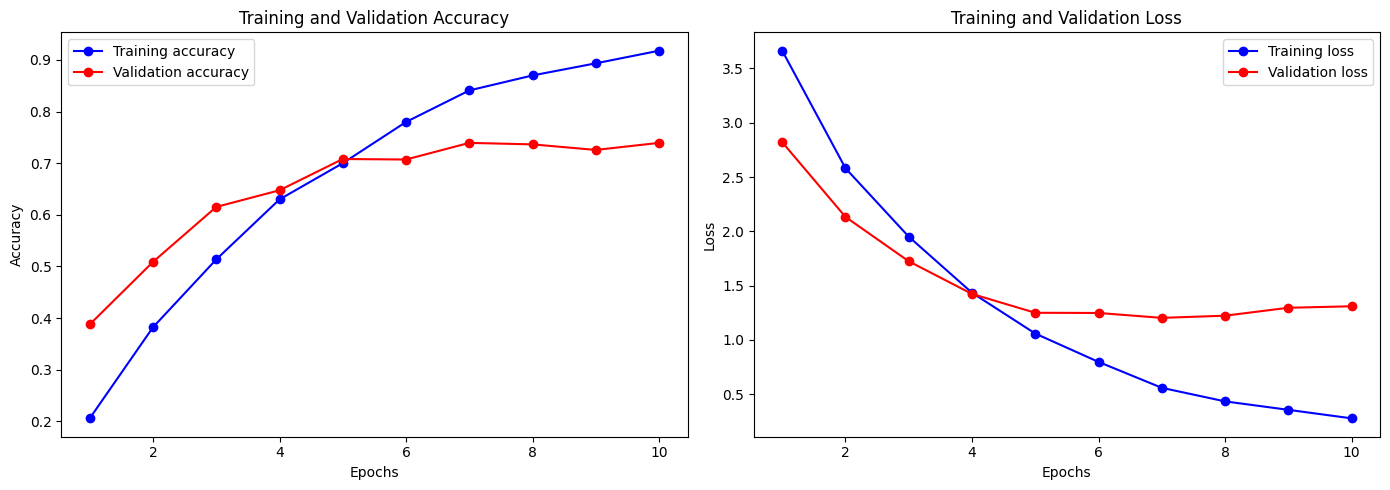

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot training and validation metrics
def plot_training_history(history):
    # Extract metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming you have already trained your model and have the `history` object
plot_training_history(history)


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Get the class labels
class_labels = label_encoder.classes_

# Check the number of unique classes
num_classes = len(class_labels)
print(f"Number of unique classes: {num_classes}")

# Print classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=class_labels, labels=range(num_classes)))


Number of unique classes: 96
                              precision    recall  f1-score   support

       Acanthiza chrysorrhoa       0.50      0.43      0.46         7
           Acanthiza lineata       0.67      0.40      0.50         5
              Acanthiza nana       0.91      0.79      0.85        38
           Acanthiza pusilla       0.56      0.66      0.61        53
        Acanthiza reguloides       0.70      0.91      0.79        35
       Acanthiza uropygialis       0.73      0.67      0.70        12
Acanthorhynchus tenuirostris       0.52      0.52      0.52        25
     Accipiter cirrocephalus       0.75      0.75      0.75        20
          Aidemosyne modesta       1.00      1.00      1.00         3
             Alauda arvensis       1.00      0.67      0.80         3
     Anhinga novaehollandiae       1.00      1.00      1.00         1
         Anthochaera phrygia       0.75      0.60      0.67         5
               Artamus minor       1.00      0.50      0.67 